## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [109]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 scikit-learn==1.3.1 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [110]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to scale the axis
from sklearn.preprocessing import StandardScaler

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

## Loading the dataset

In [111]:
# loading data into a pandas dataframe
loans = pd.read_csv('https://raw.githubusercontent.com/srikanthkodali9/datasets/refs/heads/main/Loan_Modelling.csv')

# creating a copy of the data
data = loans.copy()

## Data Overview

* Observations
* Sanity checks

In [112]:
#Checking the Head of the Data
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [113]:
#Checking for Attribute types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [114]:
#Checking the statistical summary of the Data
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [115]:
#Checking for Shape of the Data
data.shape


(5000, 14)

In [116]:
#Checking for missing values
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [117]:
# checking for duplicate values
data.duplicated().sum()

0

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

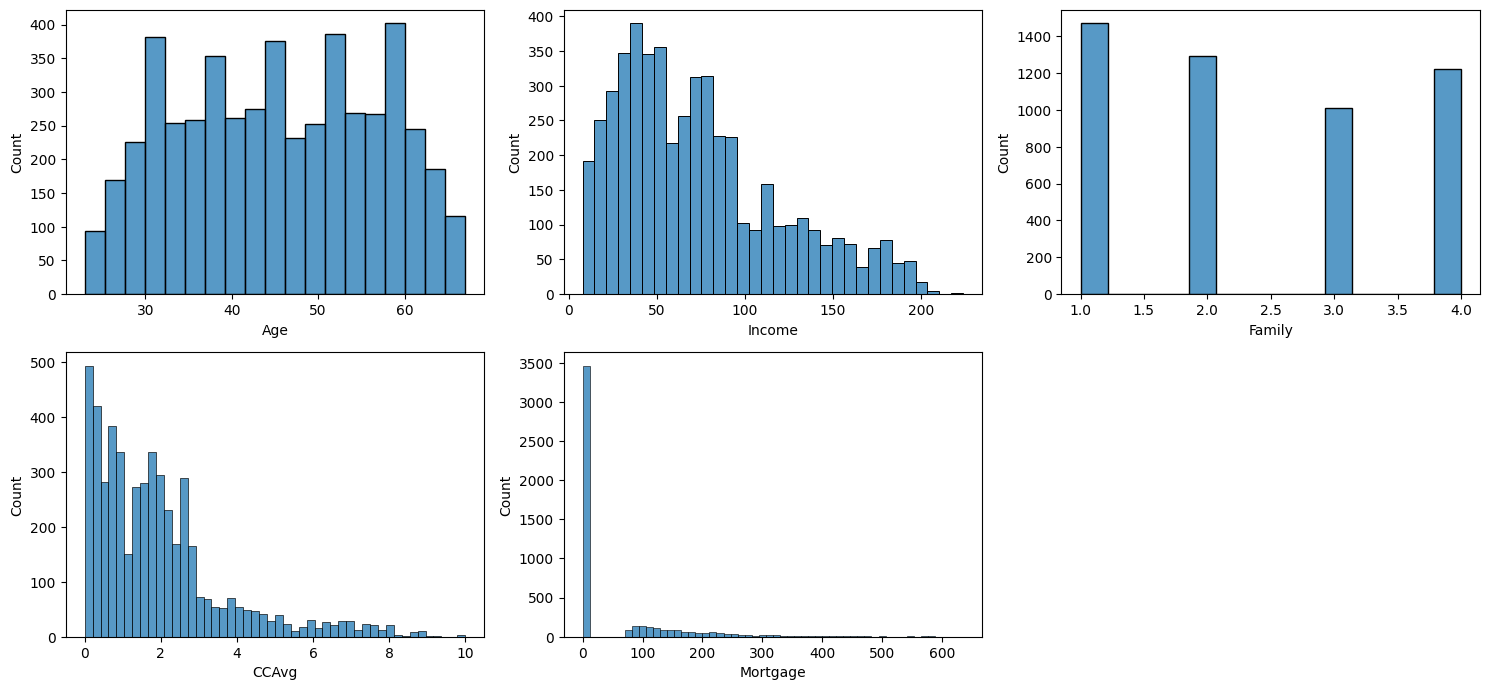

In [120]:
#Univariatare Analysis

# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Income', 'Family', 'CCAvg','Mortgage']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

- **CCAvg**, **Mortgage** and **Income** exhibit a right-skewed distribution.

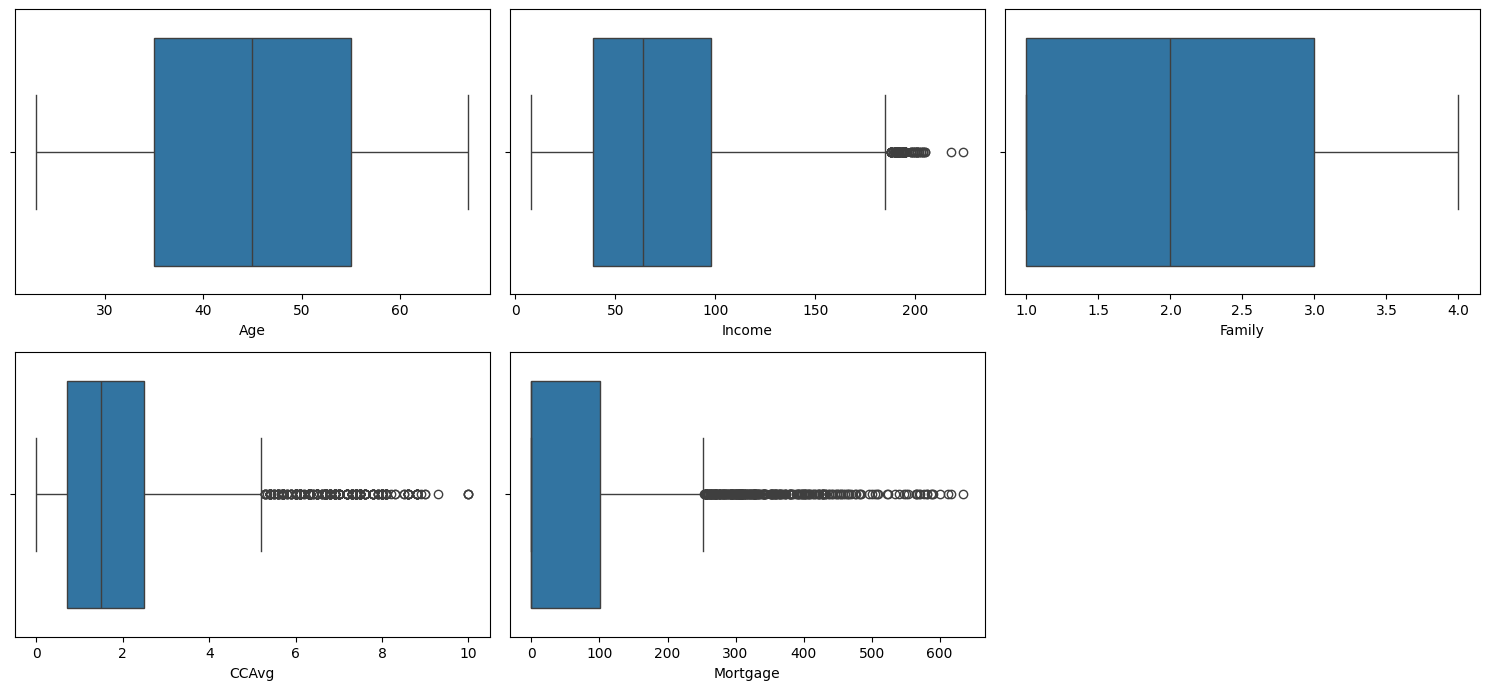

In [121]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots

* There are outliers in all the numerical attributes in the data.

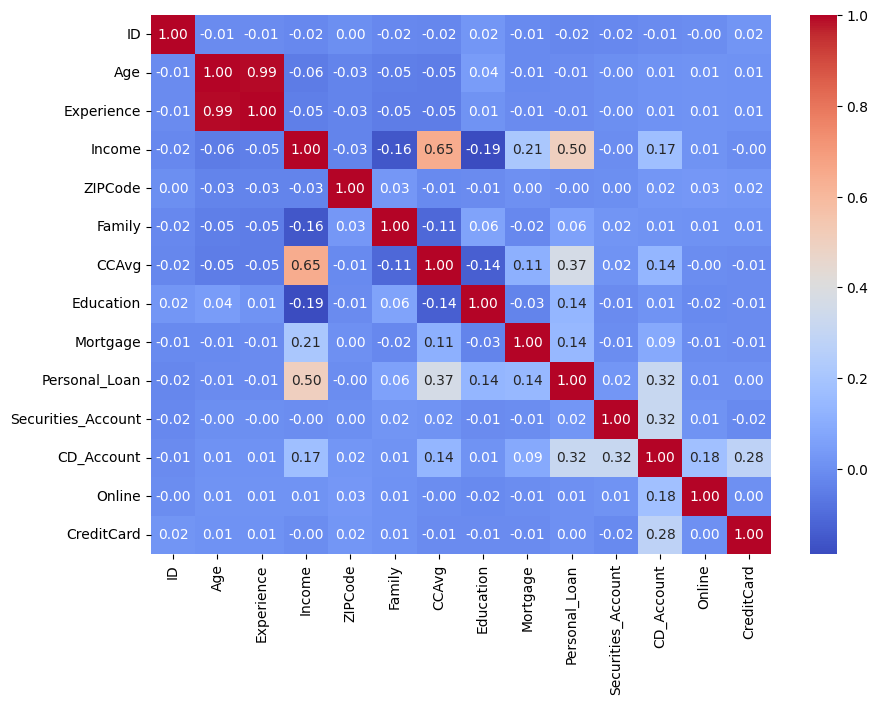

In [122]:
# Bivariate Analysis

# defining the figure size
plt.figure(figsize=(10, 7))

# plotting the correlation heatmap
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

<Figure size 1200x800 with 0 Axes>

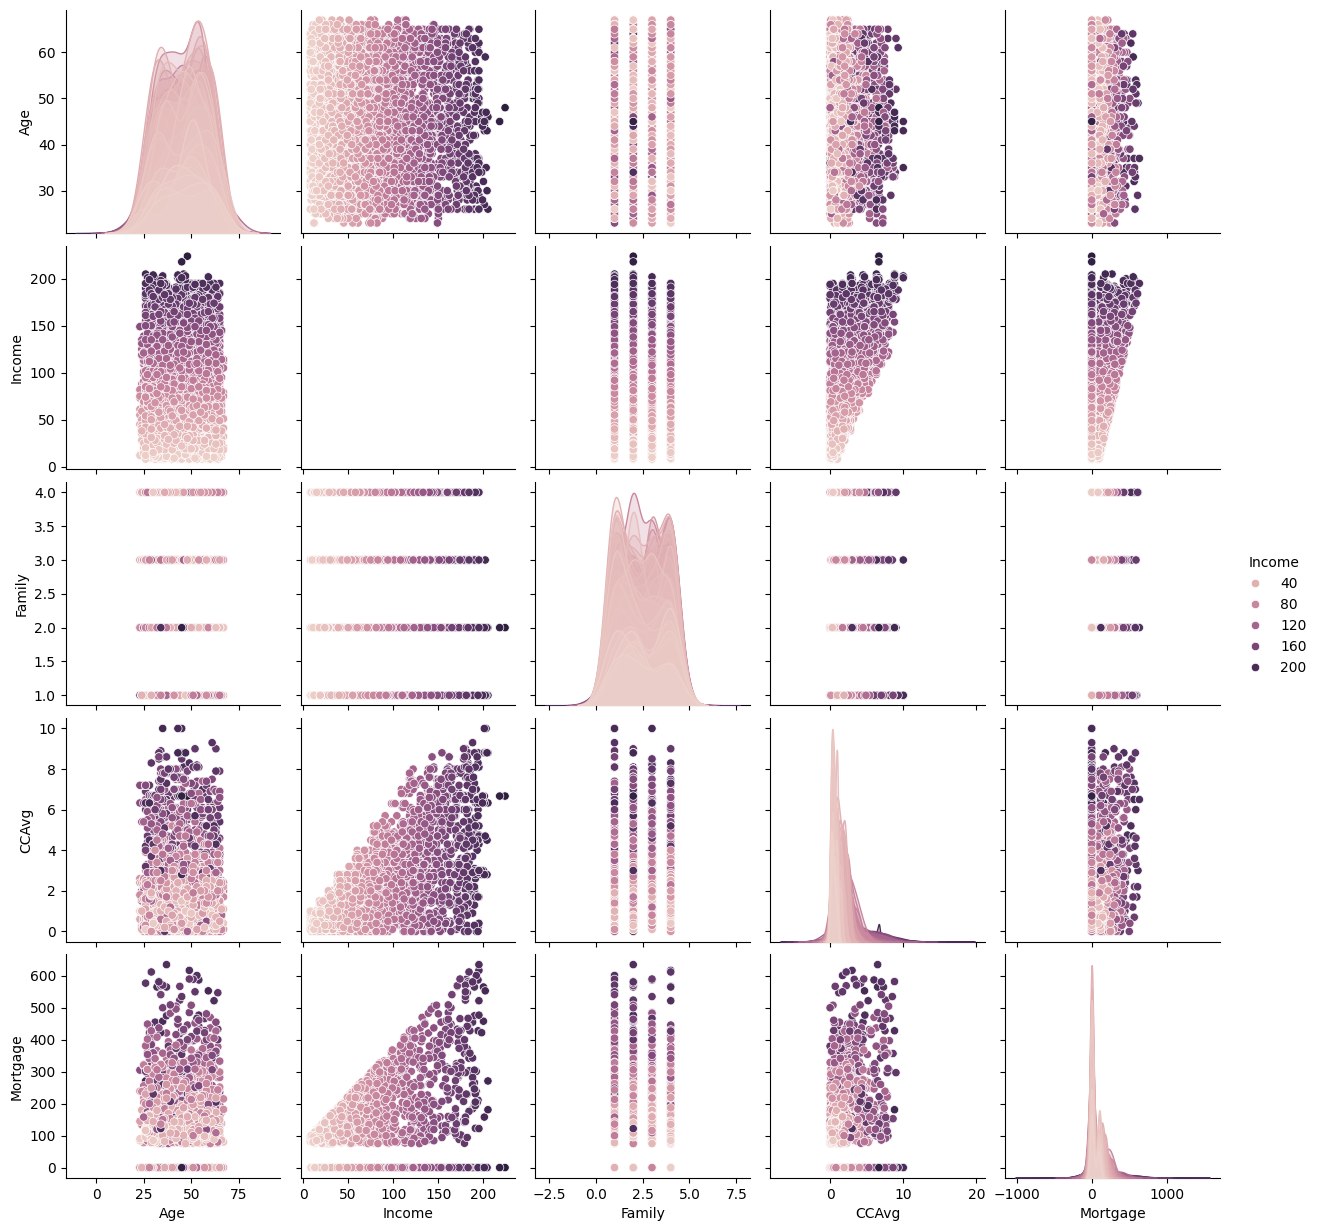

In [123]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=num_features, hue='Income', diag_kind='kde');

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

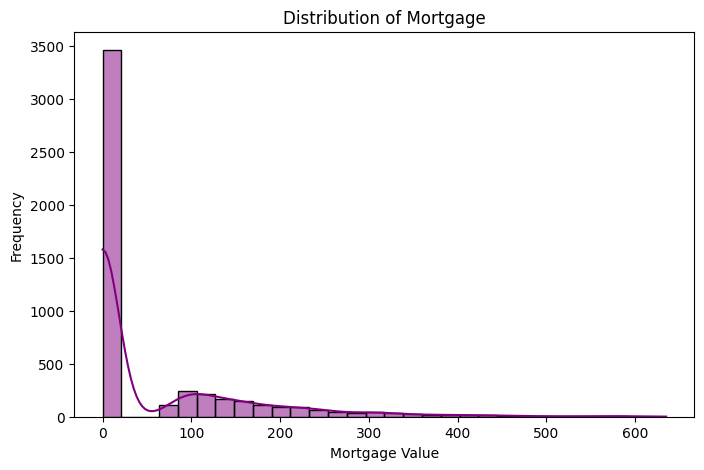

In [124]:
# Question 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
# defining the figure size
plt.figure(figsize=(8, 5))

# plotting the distribution
sns.histplot(data['Mortgage'], kde=True, bins=30, color='purple')
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value')
plt.ylabel('Frequency')
plt.show()

# The mortgage attribute has a right-skewed distribution, with most values concentrated near zero. There are noticeable outliers, as some customers have very high mortgage values.

<ipython-input-125-b22cb267aabc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_card_count.index, y=credit_card_count.values, palette='Blues')


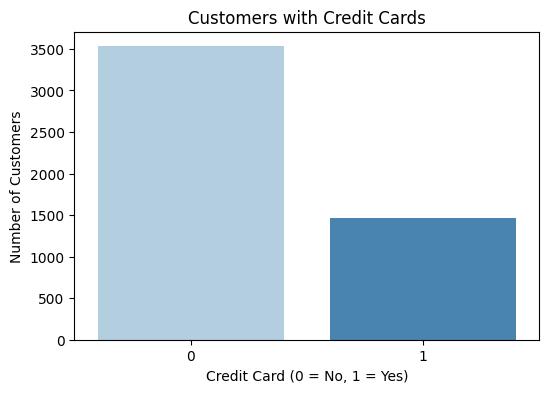

In [125]:
# Question 2. How many customers have credit cards?

credit_card_count = data['CreditCard'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=credit_card_count.index, y=credit_card_count.values, palette='Blues')
plt.title('Customers with Credit Cards')
plt.xlabel('Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


# The majority of customers (3,530) do not have a credit card, while 1,470 do.

In [126]:
#Question 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

# Based on the heat map from above we can see that Income has strongest correlation with Personal Loan.


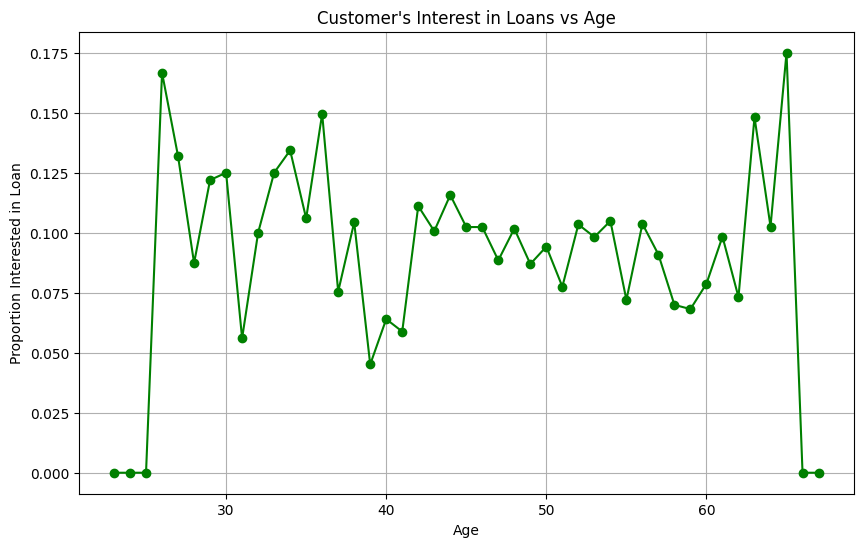

In [127]:
# Question 4. How does a customer's interest in purchasing a loan vary with their age?

loan_by_age = data.groupby('Age')['Personal_Loan'].mean()
plt.figure(figsize=(10, 6))
plt.plot(loan_by_age.index, loan_by_age.values, marker='o', color='green')
plt.title("Customer's Interest in Loans vs Age")
plt.xlabel('Age')
plt.ylabel('Proportion Interested in Loan')
plt.grid(True)
plt.show()

# Loan interest does not show a strong linear trend with age. based on the Below Distribution


<ipython-input-128-b88ee7c9ef73>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_by_education.index, y=loan_by_education.values, palette='viridis')


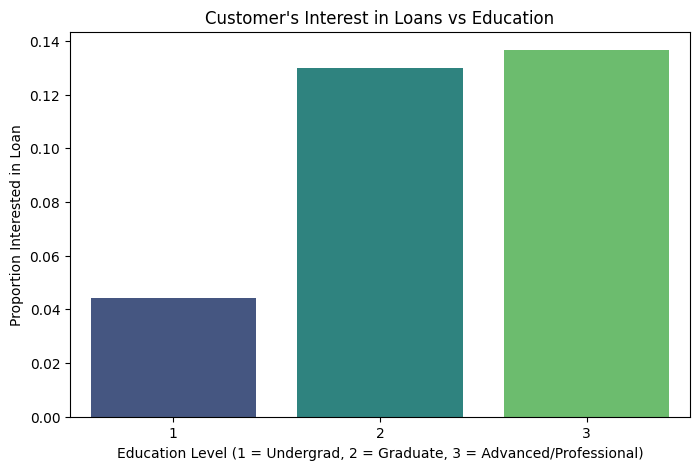

In [128]:
#Question 5. How does a customer's interest in purchasing a loan vary with their education?

loan_by_education = data.groupby('Education')['Personal_Loan'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=loan_by_education.index, y=loan_by_education.values, palette='viridis')
plt.title("Customer's Interest in Loans vs Education")
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)')
plt.ylabel('Proportion Interested in Loan')
plt.show()
 # Customer's with Higher education levels are associated with greater interest in personal loans. based on the below Distribution.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [130]:
# Missing value
#Checking for missing values
data.isnull().sum()
## No missing values were found, so no imputation was required.


# Feature engineering (if needed)

## - Negative values in the Experience column were corrected by taking their absolute values.

# Outlier detection and treatment (if needed)

## - Outliers were detected using Z-scores and capped at the 99th percentile for numerical features (Age, Experience, Income, CCAvg, and Mortgage).

# Preparing data for modeling

## Dropped unnecessary columns: ID and ZIPCode. Scaled all numerical features for better model performance.

# Drop unnecessary columns
data = data.drop(['ID', 'ZIPCode'], axis=1)

# Any other preprocessing steps (if needed)
## The dataset is now split into features (X) and target (y) and scaled.

# defining the explanatory (independent) and response (dependent) variables
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Model Building

### Model Evaluation Criterion

*Decision Tree Initialize


### Model Building

In [131]:
#Pre defined utility Function for Model Evaluation

# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")


,Accuracy,Recall,Precision,F1
0,0.986,0.860681,0.985816,0.919008


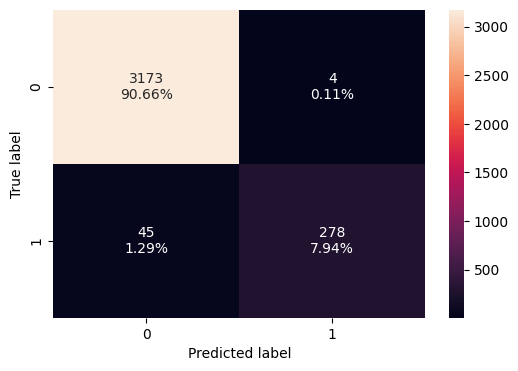

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')
decision_tree_model.fit(X_train, y_train)

# Predictions
y_pred = decision_tree_model.predict(X_test)

plot_confusion_matrix(decision_tree_model, X_train, y_train)

decision_tree_model_perf = model_performance_classification(
    decision_tree_model, X_train, y_train
)
decision_tree_model_perf

,Accuracy,Recall,Precision,F1
0,0.982667,0.872611,0.958042,0.913333


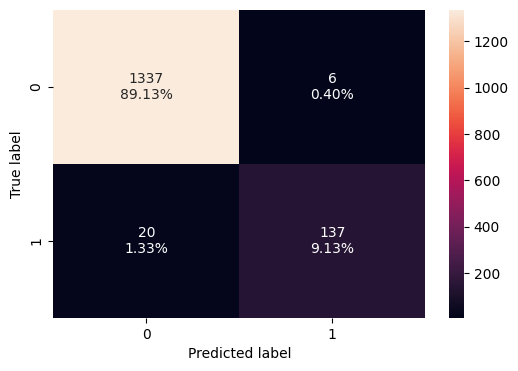

In [133]:
#Testing Dataset
plot_confusion_matrix(decision_tree_model, X_test, y_test)

decision_tree_model_test_perf = model_performance_classification(
    decision_tree_model, X_test, y_test
)
decision_tree_model_test_perf

#### Visualizing the Decision Tree

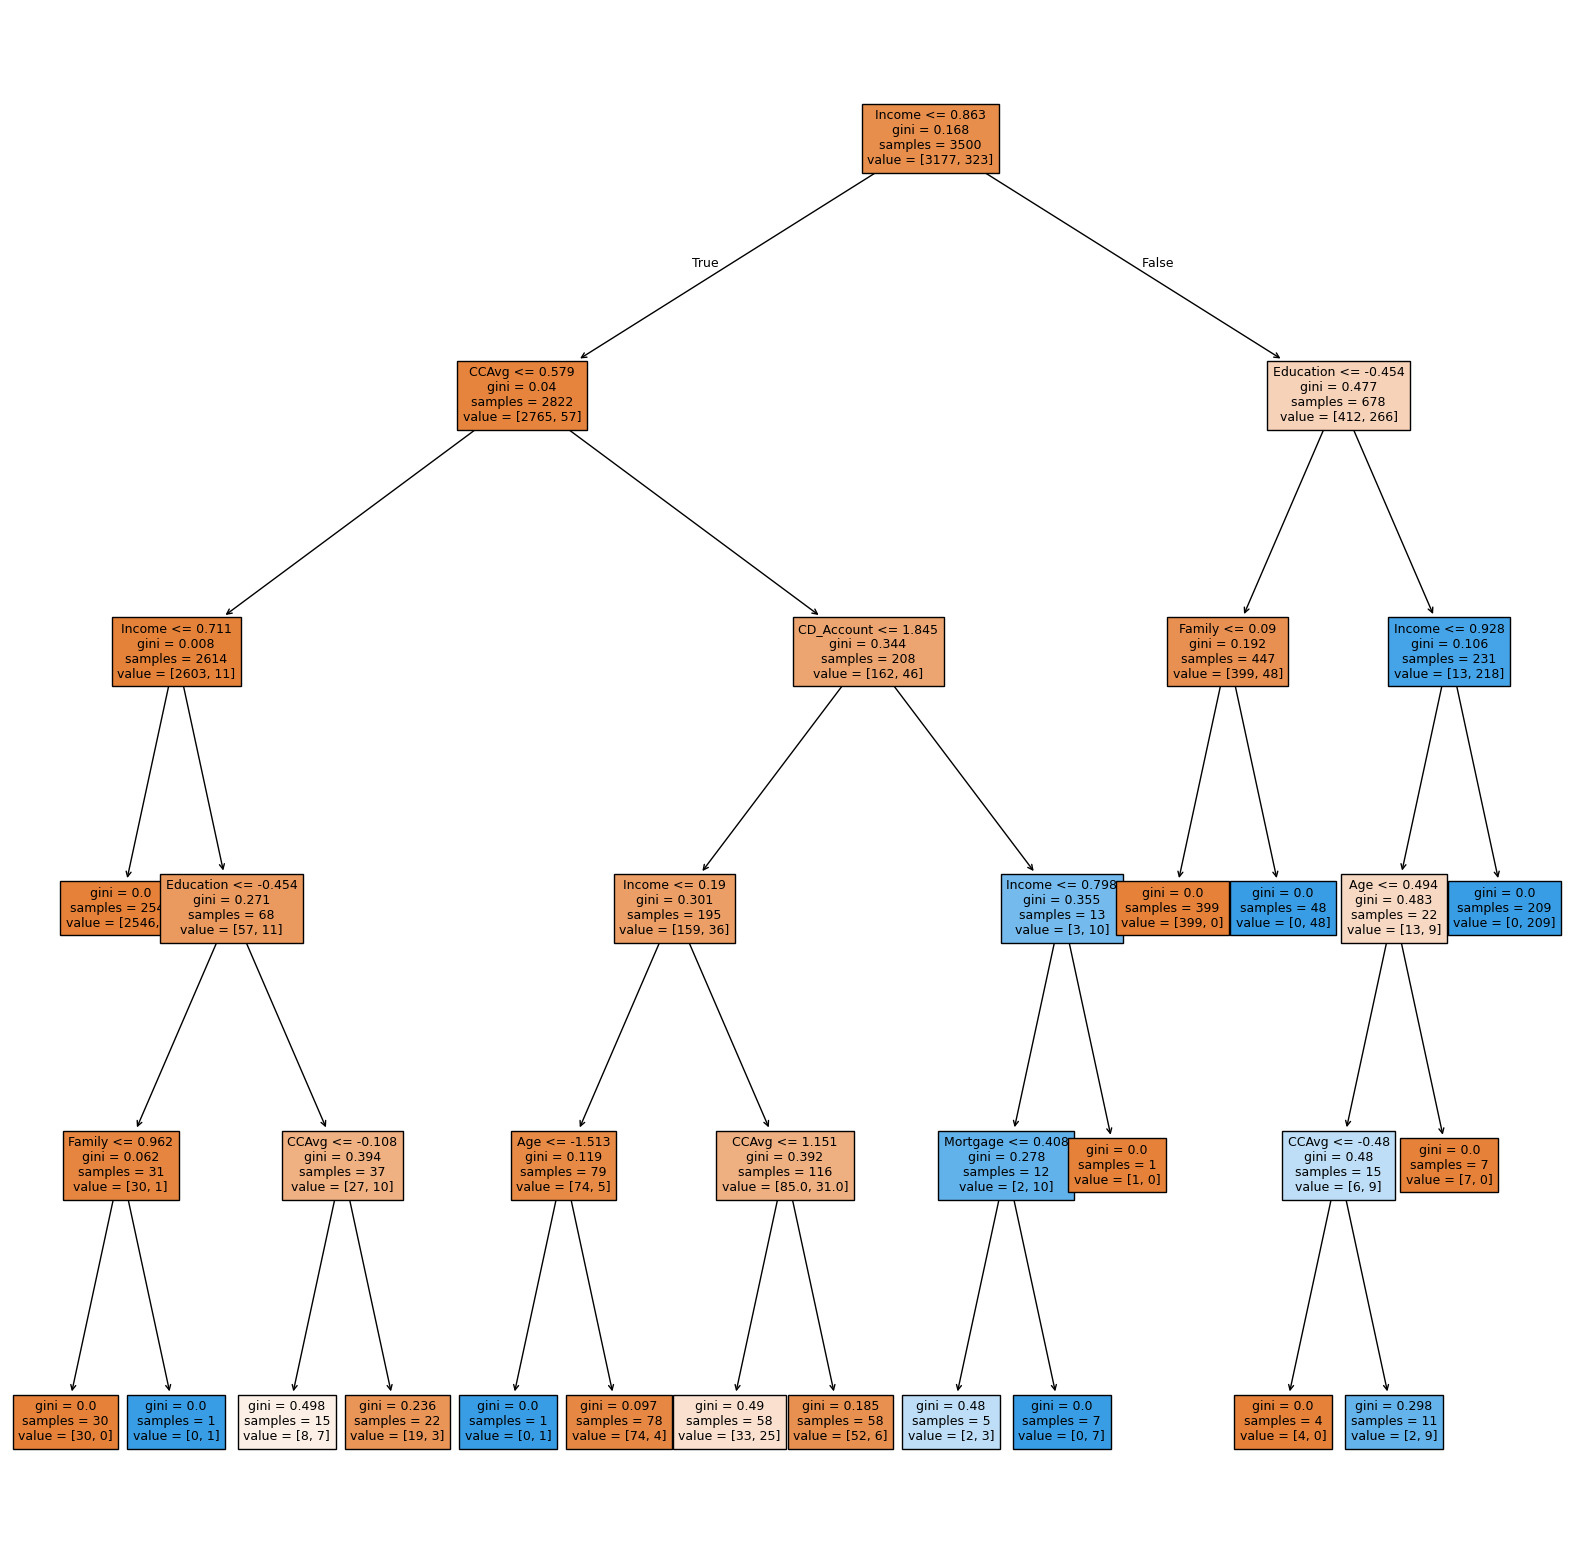

In [134]:
# list of feature names in X_train
feature_names = list(X.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    decision_tree_model,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [135]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        decision_tree_model,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 0.86
|   |--- CCAvg <= 0.58
|   |   |--- Income <= 0.71
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  0.71
|   |   |   |--- Education <= -0.45
|   |   |   |   |--- Family <= 0.96
|   |   |   |   |   |--- weights: [30.00, 0.00] class: 0
|   |   |   |   |--- Family >  0.96
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Education >  -0.45
|   |   |   |   |--- CCAvg <= -0.11
|   |   |   |   |   |--- weights: [8.00, 7.00] class: 0
|   |   |   |   |--- CCAvg >  -0.11
|   |   |   |   |   |--- weights: [19.00, 3.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- CD_Account <= 1.85
|   |   |   |--- Income <= 0.19
|   |   |   |   |--- Age <= -1.51
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  -1.51
|   |   |   |   |   |--- weights: [74.00, 4.00] class: 0
|   |   |   |--- Income >  0.19
|   |   |   |   |--- CCAvg <= 1.15
|   |   |   |   |   |--- weights: [33.00, 25.00] class: 0
|   |   |   |  

## Model Performance Improvement

### Decision Tree (Pre-pruning)

In [136]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 5, 2)
max_leaf_nodes_values = np.arange(5, 10, 12)
min_samples_split_values = np.arange(5, 10, 12)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

,Accuracy,Recall,Precision,F1
0,0.98,0.823529,0.953405,0.883721


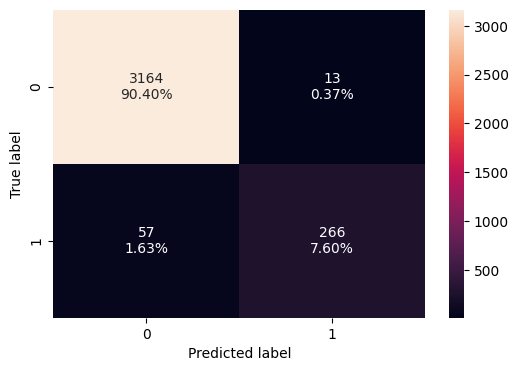

In [137]:
# creating an instance of the best model
decision_tree_model2 = best_estimator

# fitting the best model to the training data
decision_tree_model2.fit(X_train, y_train)

#Training Dataset
plot_confusion_matrix(decision_tree_model2, X_train, y_train)

decision_tree_model2_train_perf = model_performance_classification(
    decision_tree_model2, X_train, y_train
)
decision_tree_model2_train_perf

,Accuracy,Recall,Precision,F1
0,0.979333,0.828025,0.970149,0.893471


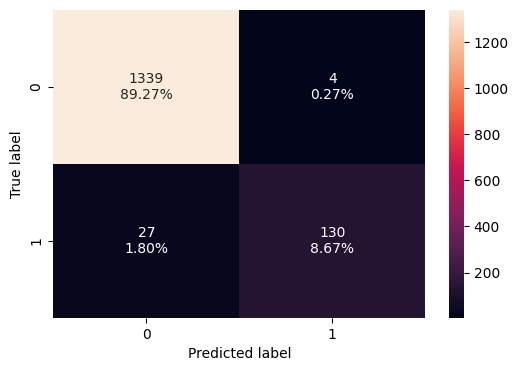

In [139]:
#Testing Dataset
plot_confusion_matrix(decision_tree_model2, X_test, y_test)

decision_tree_model2_train_perf = model_performance_classification(
    decision_tree_model2, X_test, y_test
)
decision_tree_model2_train_perf

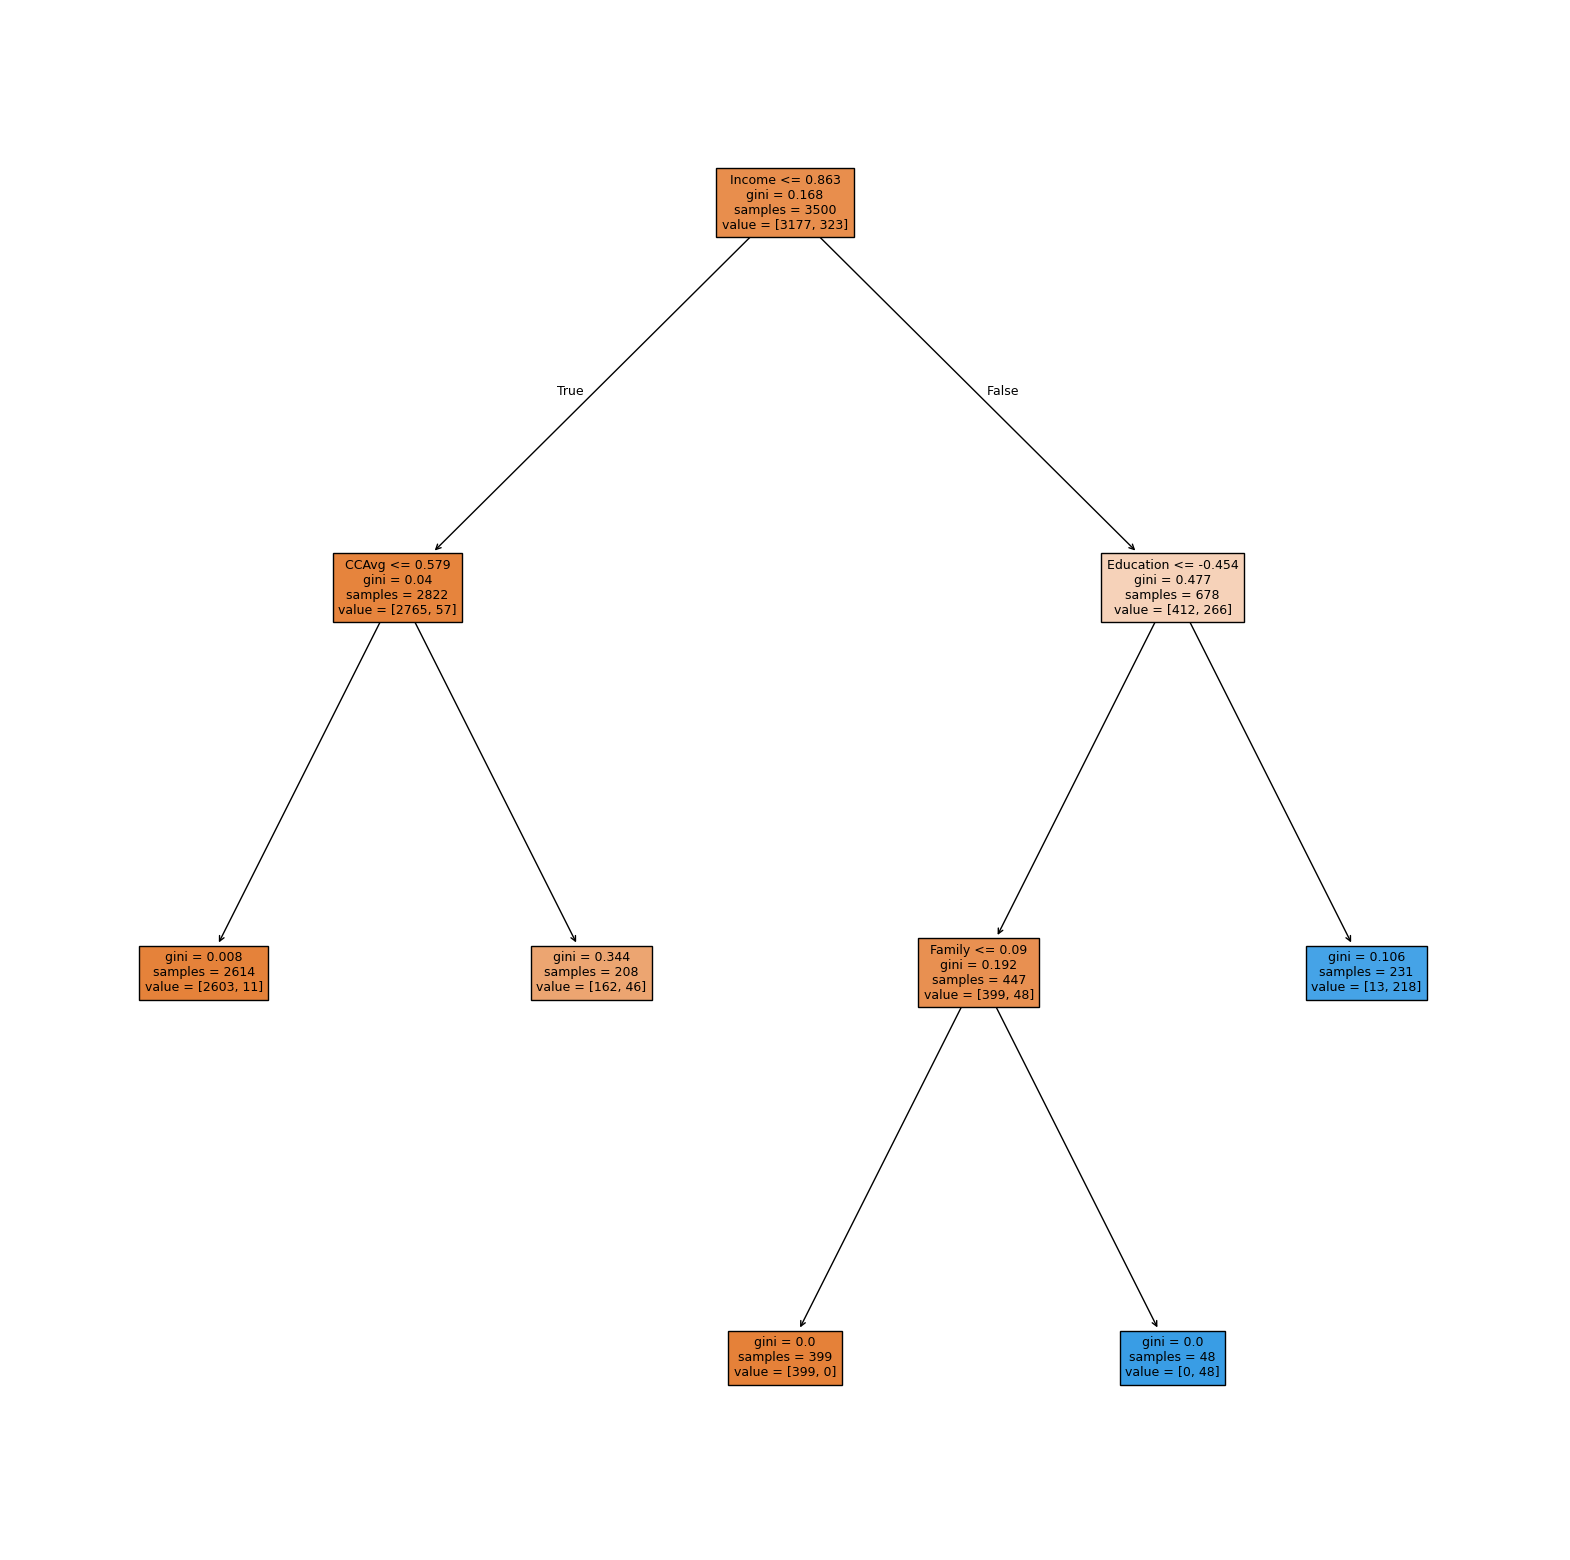

In [140]:
# list of feature names in X_train
feature_names = list(X.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    decision_tree_model2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [142]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        decision_tree_model2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 0.86
|   |--- CCAvg <= 0.58
|   |   |--- weights: [2603.00, 11.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- weights: [162.00, 46.00] class: 0
|--- Income >  0.86
|   |--- Education <= -0.45
|   |   |--- Family <= 0.09
|   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |--- Family >  0.09
|   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  -0.45
|   |   |--- weights: [13.00, 218.00] class: 1



### Decision Tree (Post-pruning)

In [143]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [144]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000245,0.000490
2,0.000271,0.001031
3,0.000275,0.001581
4,0.000279,0.002139
5,0.000381,0.002520
6,0.000381,0.003282
7,0.000381,0.003663
8,0.000429,0.004091
9,0.000429,0.004948


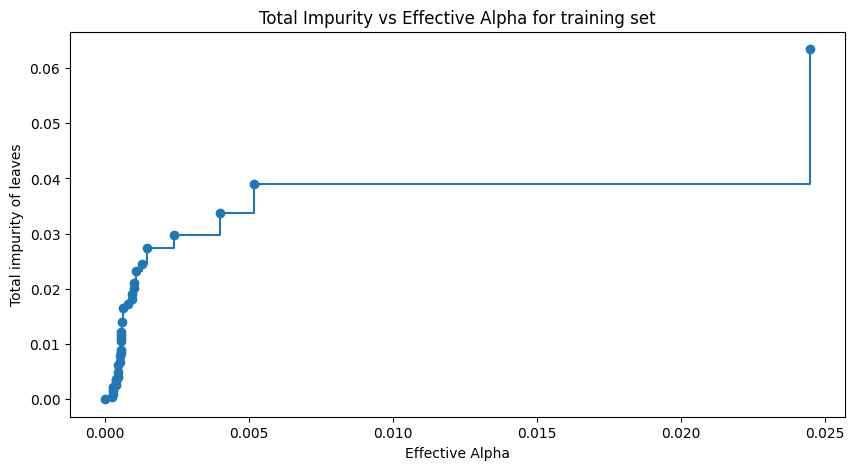

In [145]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [146]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.05206542558865251


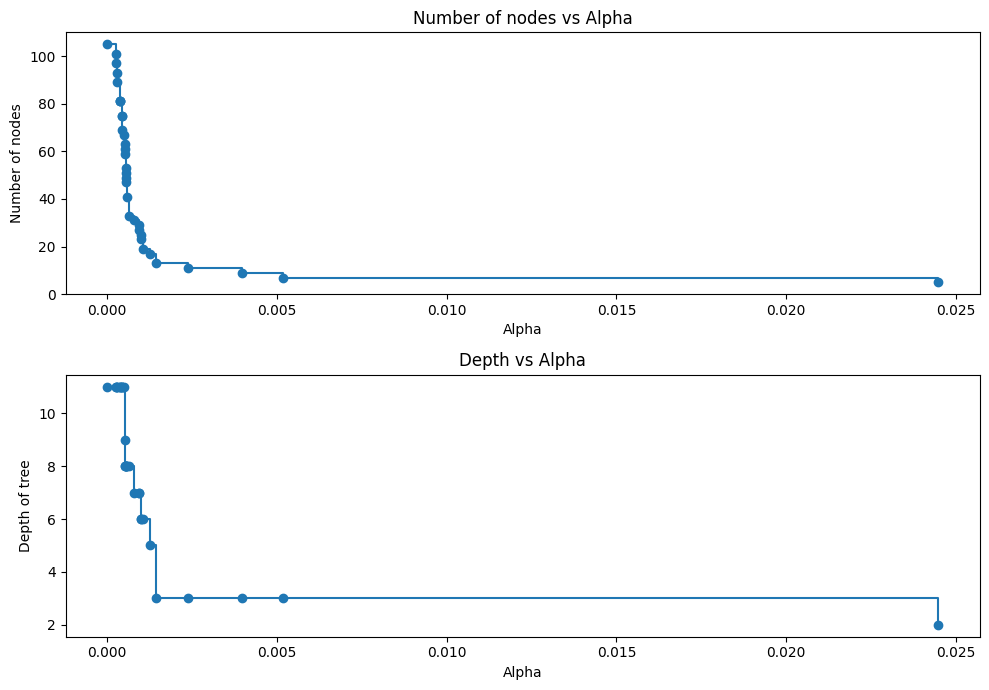

In [147]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [148]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [149]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


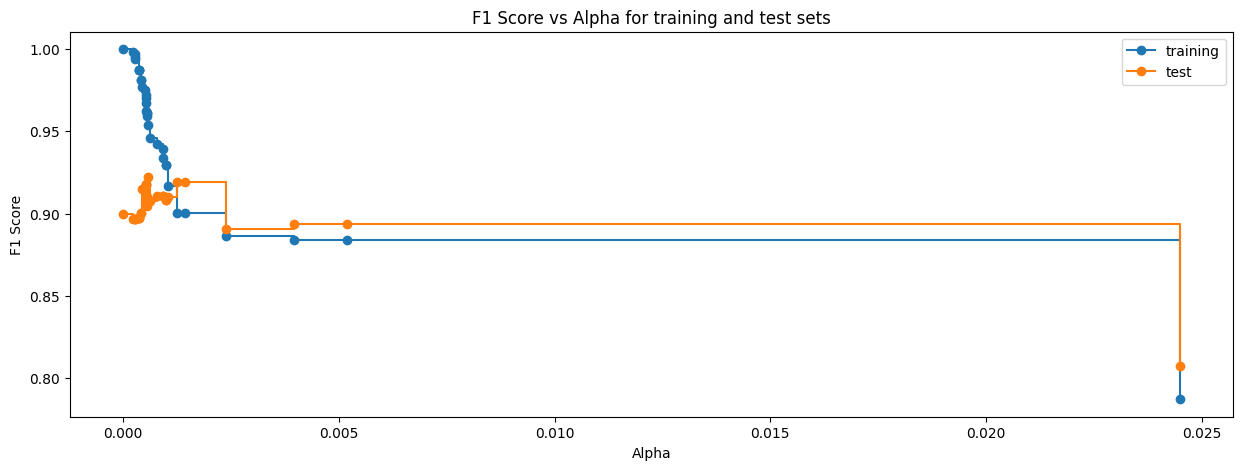

In [150]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

DecisionTreeClassifier(ccp_alpha=0.0005936157454184019, random_state=42)


,Accuracy,Recall,Precision,F1
0,0.991714,0.934985,0.974194,0.954186


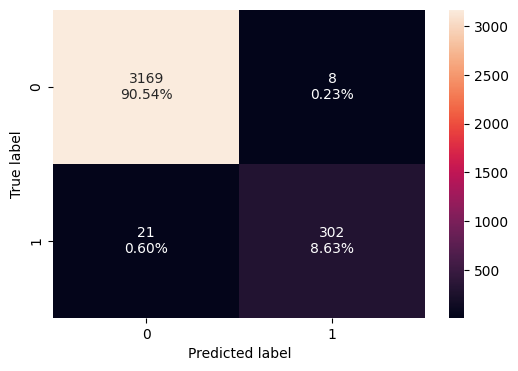

In [151]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
decision_tree_model3 = clfs[index_best_model]
print(decision_tree_model3)

#Training Dateset
plot_confusion_matrix(decision_tree_model3, X_train, y_train)

decision_tree_model3_train_perf = model_performance_classification(
    decision_tree_model3, X_train, y_train
)
decision_tree_model3_train_perf

,Accuracy,Recall,Precision,F1
0,0.984,0.904459,0.940397,0.922078


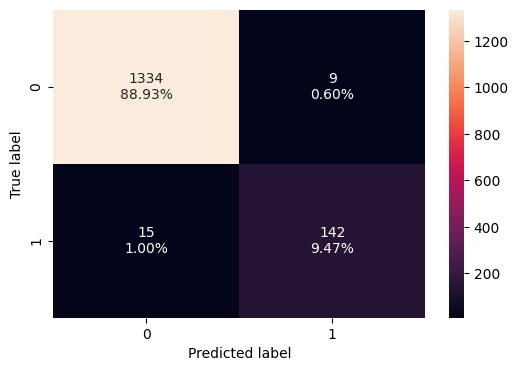

In [152]:
#Testing Dataset
plot_confusion_matrix(decision_tree_model3, X_test, y_test)
decision_tree_model3_test_perf = model_performance_classification(
    decision_tree_model3, X_test, y_test
)
decision_tree_model3_test_perf

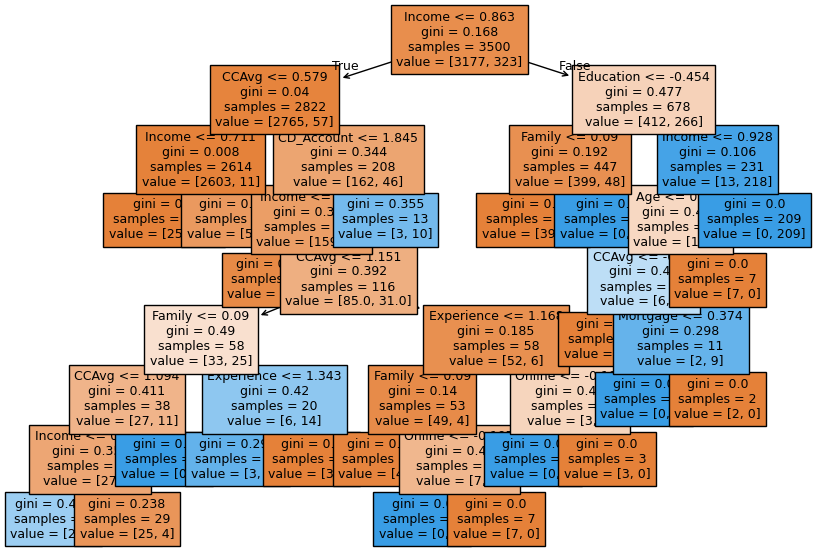

In [153]:
# list of feature names in X_train
feature_names = list(X.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    decision_tree_model3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [154]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        decision_tree_model3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 0.86
|   |--- CCAvg <= 0.58
|   |   |--- Income <= 0.71
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  0.71
|   |   |   |--- weights: [57.00, 11.00] class: 0
|   |--- CCAvg >  0.58
|   |   |--- CD_Account <= 1.85
|   |   |   |--- Income <= 0.19
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  0.19
|   |   |   |   |--- CCAvg <= 1.15
|   |   |   |   |   |--- Family <= 0.09
|   |   |   |   |   |   |--- CCAvg <= 1.09
|   |   |   |   |   |   |   |--- Income <= 0.21
|   |   |   |   |   |   |   |   |--- weights: [2.00, 4.00] class: 1
|   |   |   |   |   |   |   |--- Income >  0.21
|   |   |   |   |   |   |   |   |--- weights: [25.00, 4.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.09
|   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |--- Family >  0.09
|   |   |   |   |   |   |--- Experience <= 1.34
|   |   |   |   |   |   |   |--- weights: [3.00, 14.00] class: 1
|   |   |   |   |

## Model Performance Comparison and Final Model Selection

In [155]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_model_perf.T,
        decision_tree_model2_train_perf.T,
        decision_tree_model3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.979333,0.991714
Recall,0.860681,0.828025,0.934985
Precision,0.985816,0.970149,0.974194
F1,0.919008,0.893471,0.954186


## Actionable Insights and Business Recommendations


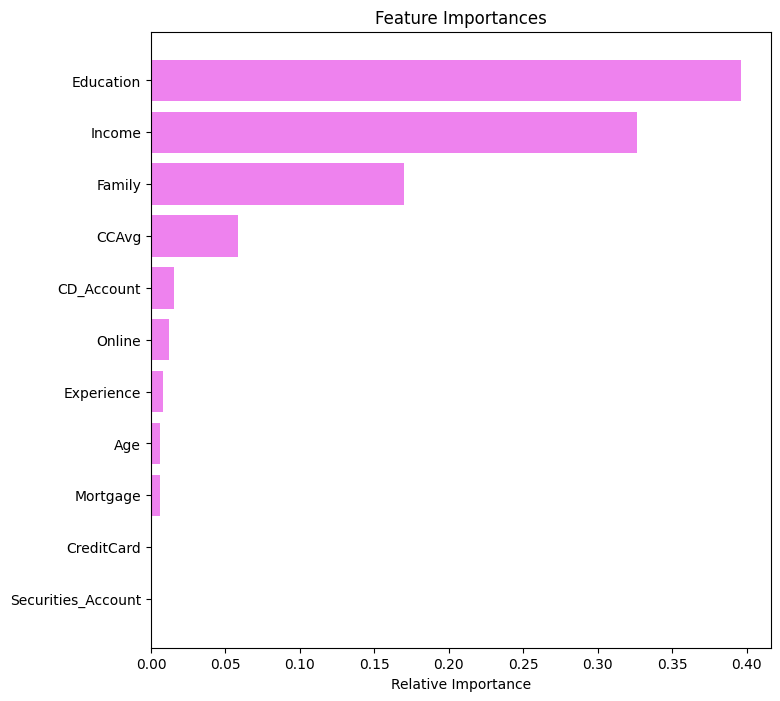

In [156]:
# importance of features in the tree building
importances = decision_tree_model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* What recommedations would you suggest to the bank?

Top Influential Features to target in Customer Attributes are as follows :

Education: Advanced or professional education level customers have the highest likelihood of accepting a loan.

Income: Customers with higher income levels are more likely to accept a loan. Marketing campaigns should target high-income earners.

Family Size: Larger families may require loans for family-related expenses like education, home upgrades, or medical needs.

CCAvg (Credit Card Spending): Customers with higher average credit card spending tend to show greater interest in loans. Promoting loans as a way to consolidate debt or manage spending could be effective.



___